<div style="background-color:#e68867; padding:10px; border:2px solid black;">
    <h1><b>Quality | Ethics | Transparency</b></h1>
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
<h2>📌 [Sweet Data: The Story Behind Chocolate Sales Trends]</h2>
    
🔹 **Author** : MagaliTrueAnalytics  
🔹 **Date** : 2025-04-18
🔹 **Sources** : [Link dataset](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet2/Data/ChocolateSales.csv)

🔹 **Objective** :This project aims to analyze chocolate sales data to uncover trends, regional variations, and seasonal patterns.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>📈 Dataset Overview</h2>
    
The Chocolate Sales dataset, available on [Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales) under the MIT license, provides a comprehensive collection of **chocolate sales data🍫**. It includes detailed records covering product details, sales quantities, revenue, and sales Person.

*As per dataset owner*, this dataset is ideal for sales forecasting, trend analysis, and business intelligence, enabling businesses to optimize pricing strategies, inventory management, and customer targeting.

**Key Features:**

**Transaction details:** Includes sale date, product name.

**Sales insights:** Records quantity shipped,revenue generated and sales representative.

**Regional data:** Tracks sales locations (Country) to analyze geographic trends.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🔎Methodology</h2>
</div>

✅**Import libraries**

In [1]:
# To execute only if environnement required
!pip install pandas numpy matplotlib seaborn

<class 'OSError'>: Not available

In [1]:
import pandas as pd
print(pd.__version__)

2.2.3


In [2]:
import numpy as np
print(np.__version__)

2.0.2


In [19]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


✅**Load dataset**

In [4]:
import requests

url = "https://raw.githubusercontent.com/MagaliTrueAnalytics/Portfolio/main/Projet2/Data/ChocolateSales.csv"

# Download file
response = requests.get(url)
if response.status_code == 200:
    with open("ChocolateSales.csv", "wb") as file:
        file.write(response.content)

    # Load into a df
    df = pd.read_csv("ChocolateSales.csv")
    print(df.head())
else:
    print("Error: Unable to access the file.")

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [18]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


✅**Data Quality Inspection & Data Wrangling**

In [12]:
print(df.dtypes)

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


In [5]:
# Convert 'Amount' in float (handling symbol '$')
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Verify the conversion
print(df['Amount'].dtype)

<unknown>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<ipython-input-5-a38dd9d1b28b>:2: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)


float64


In [20]:
#check for missing value
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [21]:
print(df[df['Date'].isna()].head())

Empty DataFrame
Columns: [Sales Person, Country, Product, Date, Amount, Boxes Shipped]
Index: []


In [6]:
# Convert Date in DateTime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

<ipython-input-6-de9e4bb6afc3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


In [9]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [25]:
print(df.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


In [7]:
# Extract the 'Month' for monthly sales trends analysis
df['Month'] = df['Date'].dt.month

# Check first rows
print(df[['Date', 'Month']].head())

        Date  Month
0 2022-01-04      1
1 2022-08-01      8
2 2022-07-07      7
3 2022-04-27      4
4 2022-02-24      2


In [28]:
# Fin duplicates
duplicates = df[df.duplicated()]

# Print duplicates
print(duplicates)

Empty DataFrame
Columns: [Sales Person, Country, Product, Date, Amount, Boxes Shipped, Month]
Index: []


The dataset does not present any particular challenges. It has already been cleaned to remove duplicates and missing values, ensuring data integrity. The data types are well-defined, and the 'Amount' sales column has been optimized for analysis. Additionally, a 'Month' column has been added to facilitate the visualization of monthly sales trends and support forecasting efforts.The dataset is fully prepared for exploration.

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎨Exploratory Data Analysis and Statistics</h2>   
</div>

✅**Overview of the dataset**

In [89]:
df['Amount'].describe()

count     1094.000000
mean      5652.308044
std       4102.442014
min          7.000000
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      22050.000000
Name: Amount, dtype: float64

In [90]:
# The min Amount
print(df[df['Amount']==7])

        Sales Person      Country             Product       Date  Amount  \
571  Gunar Cockshoot           UK     99% Dark & Pure 2022-03-07     7.0   
865      Kaine Padly  New Zealand  Smooth Sliky Salty 2022-04-12     7.0   

     Boxes Shipped  Month  
571             84      3  
865            518      4  


In [94]:
filtered_df = df[df['Amount'] >= 10]

print(f"Valeurs exclues :\n{df[df['Amount'] < 10]}")  # Afficher celles qu'on retire

Valeurs exclues :
        Sales Person      Country             Product       Date  Amount  \
571  Gunar Cockshoot           UK     99% Dark & Pure 2022-03-07     7.0   
865      Kaine Padly  New Zealand  Smooth Sliky Salty 2022-04-12     7.0   

     Boxes Shipped  Month  
571             84      3  
865            518      4  


➡️The minimum observed value in the 'Amount' distribution reveals an outlier, possibly due to a promotional sample. However, it does not affect the visualization, so filtering the data to exclude it is unnecessary.

In [95]:
# Group Sales by Country
sales_by_country = df.groupby('Country')['Amount'].sum().reset_index()
print(sales_by_country)

       Country     Amount
0    Australia  1137367.0
1       Canada   962899.0
2        India  1045800.0
3  New Zealand   950411.0
4           UK  1051785.0
5          USA  1035349.0


In [96]:
# Group Boxes Shipped by Country
boxes_by_country = df.groupby('Country')['Boxes Shipped'].sum().reset_index()
print(boxes_by_country)

       Country  Boxes Shipped
0    Australia          32647
1       Canada          31221
2        India          29470
3  New Zealand          26062
4           UK          30181
5          USA          26824


In [97]:
# Group Sales by Month
sales_by_month = df.groupby('Month')['Amount'].sum().reset_index()
print(sales_by_month)

   Month    Amount
0      1  896105.0
1      2  699377.0
2      3  749476.0
3      4  674044.0
4      5  752892.0
5      6  865144.0
6      7  803425.0
7      8  743148.0


In [98]:
# Group Sales by Month and by Country
sales_by_month_country = df.groupby(['Month', 'Country'])['Amount'].sum().reset_index()
print(sales_by_month_country)

    Month      Country    Amount
0       1    Australia  187383.0
1       1       Canada  143997.0
2       1        India  143430.0
3       1  New Zealand  124488.0
4       1           UK  188531.0
5       1          USA  108276.0
6       2    Australia  126406.0
7       2       Canada  134456.0
8       2        India   83888.0
9       2  New Zealand  132293.0
10      2           UK   99904.0
11      2          USA  122430.0
12      3    Australia  165431.0
13      3       Canada  129409.0
14      3        India   96033.0
15      3  New Zealand  139020.0
16      3           UK  105511.0
17      3          USA  114072.0
18      4    Australia  120561.0
19      4       Canada   89194.0
20      4        India  117383.0
21      4  New Zealand  105847.0
22      4           UK  105973.0
23      4          USA  135086.0
24      5    Australia  124264.0
25      5       Canada   85092.0
26      5        India  141099.0
27      5  New Zealand   91301.0
28      5           UK  154742.0
29      5 

✅**Exploratory Data Analysis → Trends & descriptive statistics**

Box plot Sales by Product

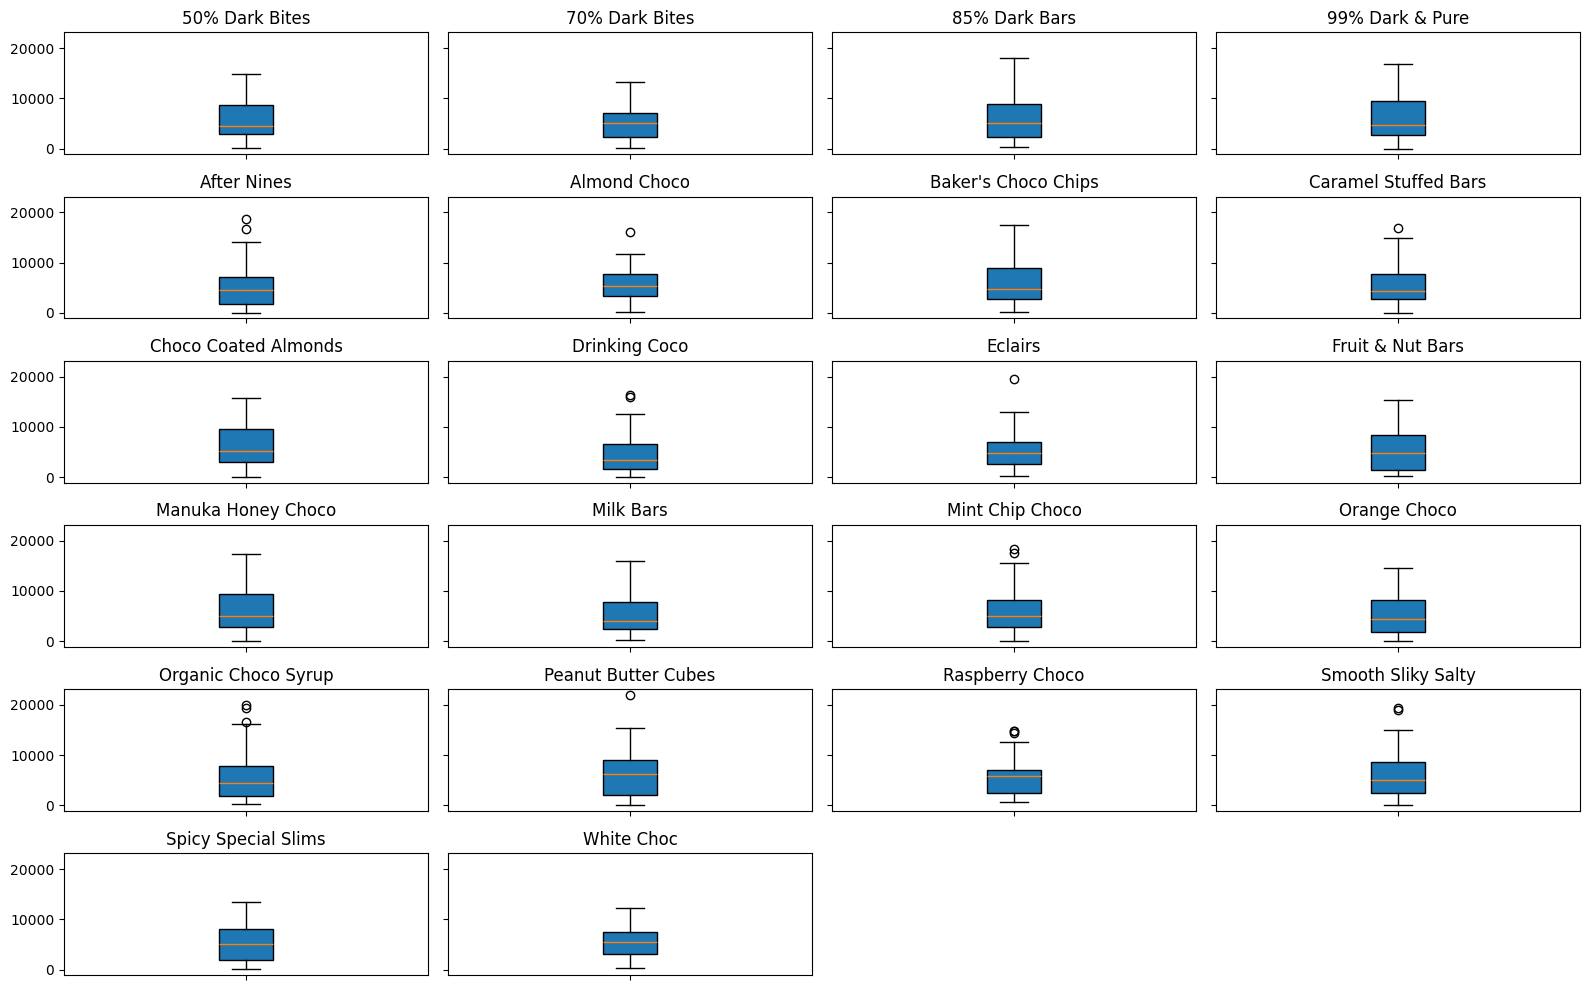

In [99]:
import math

# Nombre de produits
num_products = df['Product'].nunique()
num_cols = 4  # Nombre de colonnes dans les subplots
num_rows = math.ceil(num_products / num_cols)  # Nombre de lignes

# Création de la figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10), sharey=True)
axes = axes.flatten()  # Transformer la matrice en liste

# Trier les produits pour un affichage ordonné
products = sorted(df['Product'].unique())

# Générer un boxplot pour chaque produit
for i, product in enumerate(products):
    axes[i].boxplot(df[df['Product'] == product]['Amount'], vert=True, patch_artist=True)
    axes[i].set_title(product)
    axes[i].set_xticklabels([""])

# Supprimer les subplots vides
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement du layout
plt.tight_layout()
plt.show()


Outliers analysis 

<ipython-input-100-a275187b77ab>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_filtered_df = filtered_df[df['Product'].isin(outlier_products)]


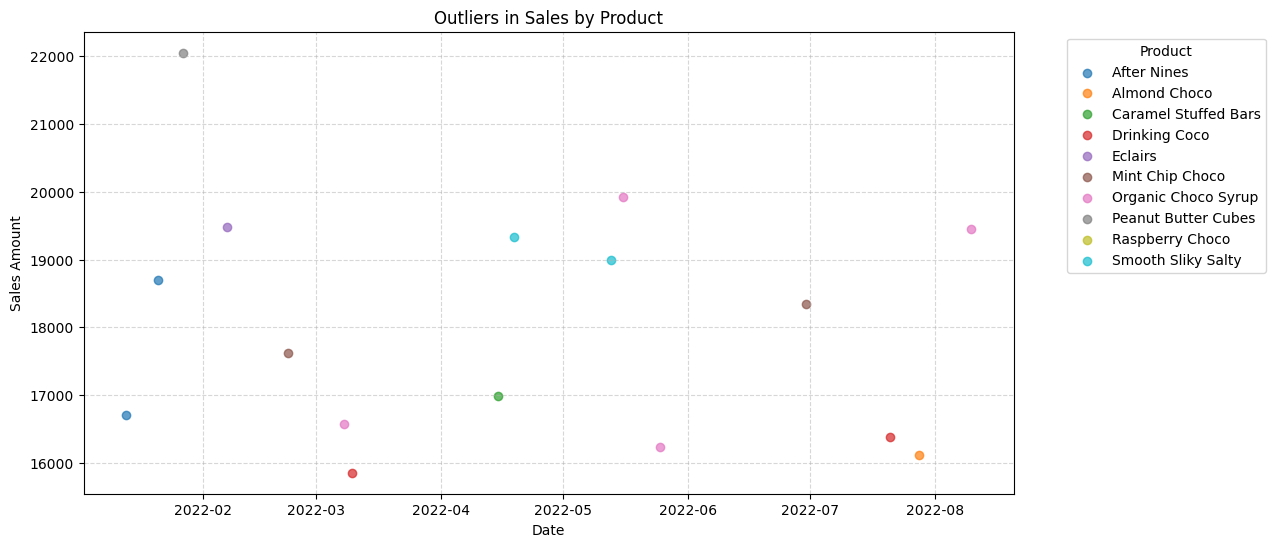

In [100]:
# Filter Products with outliers
outlier_products = ["After Nines", "Almond Choco", "Caramel Stuffed Bars", "Drinking Coco",
                    "Eclairs", "Mint Chip Choco", "Organic Choco Syrup", "Peanut Butter Cubes",
                    "Raspberry Choco", "Smooth Sliky Salty"]

product_filtered_df = df[df['Product'].isin(outlier_products)]

# Interquartile Range
Q1 = product_filtered_df['Amount'].quantile(0.25)
Q3 = product_filtered_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define limit of outliers

outlier_threshold_high = Q3 + 1.5 * IQR

# Filter outlier above higher threshold
outliers_df = product_filtered_df[(product_filtered_df['Amount'] > outlier_threshold_high)] 

# Scatter plot
plt.figure(figsize=(12, 6))

for product in outlier_products:
    subset = outliers_df[outliers_df['Product'] == product]
    plt.scatter(subset['Date'], subset['Amount'], label=product, alpha=0.7)
    
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Outliers in Sales by Product")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks()

plt.show()

In [101]:
print(outliers_df[['Product', 'Country', 'Date','Amount', 'Boxes Shipped']].sort_values(by='Amount', ascending=False))

                   Product      Country       Date   Amount  Boxes Shipped
543    Peanut Butter Cubes        India 2022-01-27  22050.0            208
135    Organic Choco Syrup        India 2022-05-16  19929.0            174
751                Eclairs  New Zealand 2022-02-07  19481.0             51
66     Organic Choco Syrup    Australia 2022-08-10  19453.0             14
589     Smooth Sliky Salty        India 2022-04-19  19327.0            135
212     Smooth Sliky Salty           UK 2022-05-13  18991.0             88
1008           After Nines           UK 2022-01-21  18697.0            176
434        Mint Chip Choco  New Zealand 2022-06-30  18340.0            285
609        Mint Chip Choco    Australia 2022-02-22  17626.0            103
372   Caramel Stuffed Bars          USA 2022-04-15  16982.0             76
891            After Nines       Canada 2022-01-13  16702.0            198
257    Organic Choco Syrup        India 2022-03-08  16569.0             99
839          Drinking Coc

✅**Exploratory Data Analysis → Correlation**

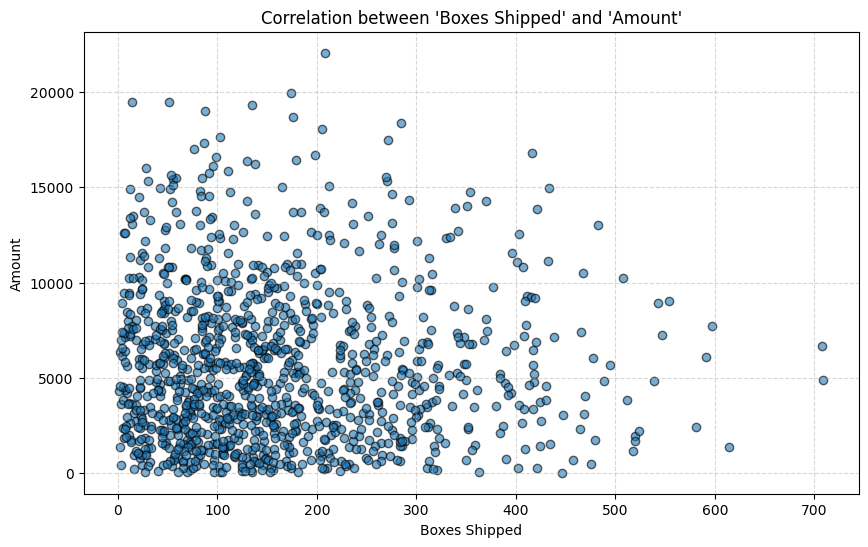

In [103]:
# Création du scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Boxes Shipped'], df['Amount'], alpha=0.6, edgecolors='k')

# Ajout des titres et labels
plt.xlabel("Boxes Shipped")
plt.ylabel("Amount")
plt.title("Correlation between 'Boxes Shipped' and 'Amount'")

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(True, linestyle='--', alpha=0.5)

# Affichage du graphique
plt.show()

In [20]:
# Sélection des variables pertinentes
correlation_df = df[["Amount", "Boxes Shipped"]]

# Calculer le coefficient de corrélation de Pearson
corr_value = correlation_df.corr(method="pearson")
print(corr_value)

                 Amount  Boxes Shipped
Amount         1.000000      -0.018827
Boxes Shipped -0.018827       1.000000


In [10]:
# Encodage des produits en valeurs numériques
df['Product_encoded'] = df['Product'].astype('category').cat.codes

# Vérification : Liste des produits et leur code
print(df[['Product', 'Product_encoded']].drop_duplicates())

                 Product  Product_encoded
0        Mint Chip Choco               14
1          85% Dark Bars                2
2    Peanut Butter Cubes               17
5     Smooth Sliky Salty               19
6        99% Dark & Pure                3
7            After Nines                4
8         50% Dark Bites                0
11          Orange Choco               15
12               Eclairs               10
13         Drinking Coco                9
15   Organic Choco Syrup               16
18             Milk Bars               13
21   Spicy Special Slims               20
25      Fruit & Nut Bars               11
28            White Choc               21
29    Manuka Honey Choco               12
33          Almond Choco                5
41       Raspberry Choco               18
42  Choco Coated Almonds                8
62   Baker's Choco Chips                6
65  Caramel Stuffed Bars                7
85        70% Dark Bites                1


In [11]:
# Calculer la corrélation entre Amount et Product_encoded
corr_value = df[['Amount', 'Product_encoded']].corr(method='pearson')
print(corr_value)

                   Amount  Product_encoded
Amount           1.000000         0.013341
Product_encoded  0.013341         1.000000


In [13]:
# Encodage des pays en valeurs numériques
df['Country_encoded'] = df['Country'].astype('category').cat.codes

# Calculer la corrélation entre Amount et Country_encoded
corr_value = df[['Amount', 'Country_encoded']].corr(method='pearson')
print(corr_value)

                  Amount  Country_encoded
Amount           1.00000          0.02622
Country_encoded  0.02622          1.00000


In [14]:
# Encodage des variables catégoriques
df['Country_encoded'] = df['Country'].astype('category').cat.codes
df['Product_encoded'] = df['Product'].astype('category').cat.codes

# Vérification du dataframe
print(df[['Amount', 'Country_encoded', 'Product_encoded', 'Boxes Shipped', 'Month']].head())

    Amount  Country_encoded  Product_encoded  Boxes Shipped  Month
0   5320.0                4               14            180      1
1   7896.0                2                2             94      8
2   4501.0                2               17             91      7
3  12726.0                0               17            342      4
4  13685.0                4               17            184      2


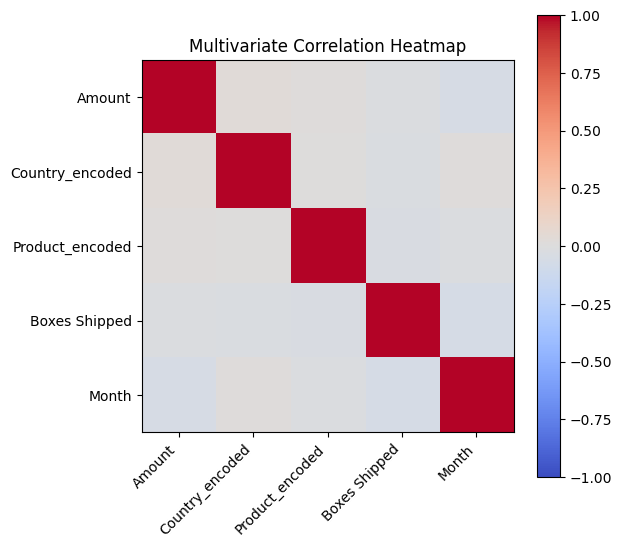

In [15]:
# Sélectionner les variables à analyser
correlation_matrix = df[['Amount', 'Country_encoded', 'Product_encoded', 'Boxes Shipped', 'Month']].corr()

# Convertir la matrice de corrélation en tableau numpy
corr_values = correlation_matrix.to_numpy()

# Création de la heatmap avec Matplotlib
fig, ax = plt.subplots(figsize=(6,6))
cax = ax.imshow(corr_values, cmap="coolwarm", vmin=-1, vmax=1)

# Ajouter la barre de couleur (colorbar)
fig.colorbar(cax)

# Ajouter les noms des variables sur les axes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)

# Titre et mise en page
plt.title("Multivariate Correlation Heatmap")
plt.show()

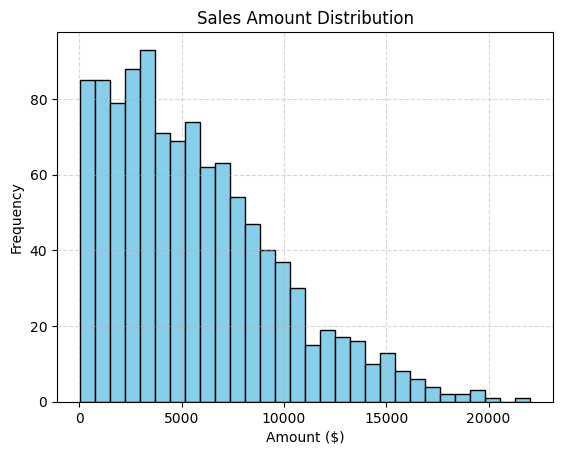

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.title("Sales Amount Distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

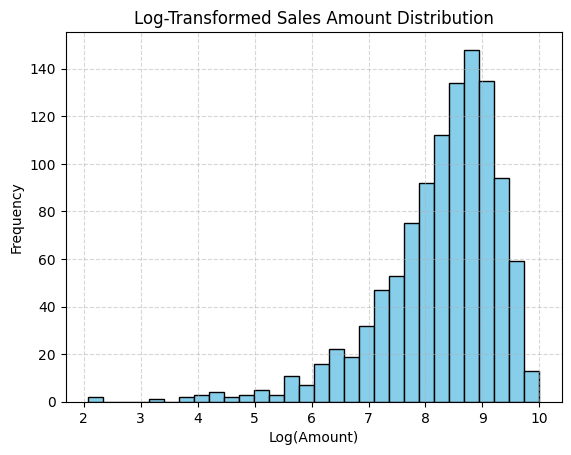

In [17]:
import numpy as np

# Transformation logarithmique (ajout de +1 pour éviter log(0))
df['Amount_log'] = np.log1p(df['Amount'])

# Vérification de la nouvelle distribution
import matplotlib.pyplot as plt

plt.hist(df['Amount_log'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Sales Amount Distribution")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modèle ANOVA avec les données normalisées
model = ols('Amount_log ~ C(Country_encoded) + C(Product_encoded) + C(Month)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq      df         F    PR(>F)
C(Country_encoded)     1.936354     5.0  0.337081  0.890603
C(Product_encoded)    17.798909    21.0  0.737723  0.796119
C(Month)              10.382170     7.0  1.290950  0.251256
Residual            1217.829687  1060.0       NaN       NaN


➡️No correlation was detected between key variables that could potentially influence sales, including Amount, Product, Boxes Shipped, and Country. Scatter plots revealed no linear relationships, and Pearson correlation statistics confirmed the absence of significant associations, even after encoding categorical variables and applying log transformations to sales data. This suggests that a more complex underlying model may be driving sales patterns. To explore this possibility, advanced machine learning techniques will be applied to identify hidden trends and improve predictive accuracy.

➡️Heatmap Correlation Amount vs Product vs Country

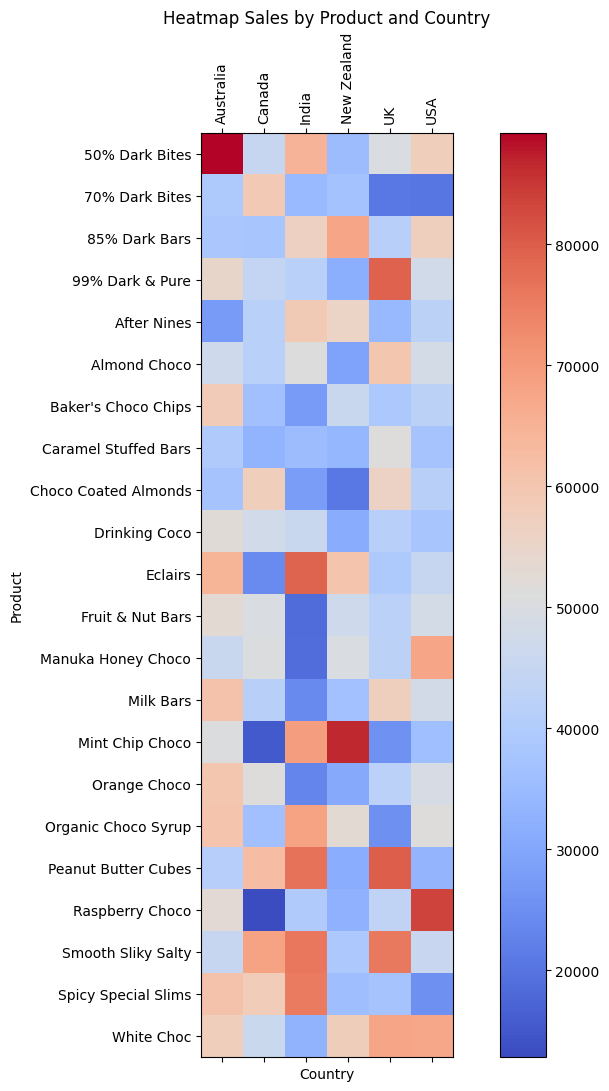

In [104]:
# Create pivot table (product x country) with Amount
pivot_table = filtered_df.pivot_table(index='Product', columns='Country', values='Amount', aggfunc='sum')

# Affichage de la heatmap
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(pivot_table, cmap="coolwarm")

# Ajout des labels
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Ajout de la barre de couleur
plt.colorbar(cax)

# Titre et ajustement
plt.title("Heatmap Sales by Product and Country")
plt.xlabel("Country")
plt.ylabel("Product")
plt.show()

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎨Visualizations</h2>   
</div>

✅**Global Sales (Trends and Monthly)**

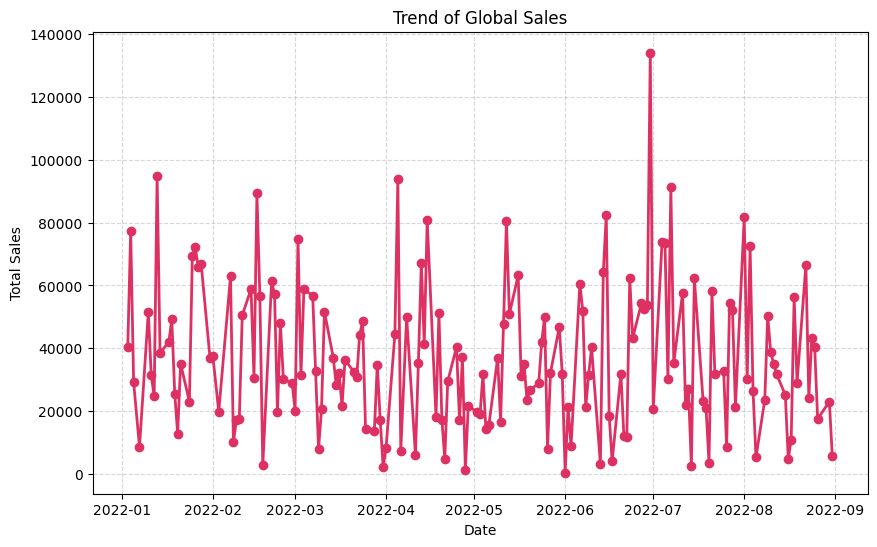

In [105]:
# Agréger les ventes par mois
daily_sales = filtered_df.groupby('Date')['Amount'].sum()

# Graphique des ventes par mois
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='#de3163', linewidth=2)

# Ajout des labels et du titre
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Trend of Global Sales")
plt.grid(True, linestyle='--', alpha=0.5)

# Affichage du graphique
plt.show()

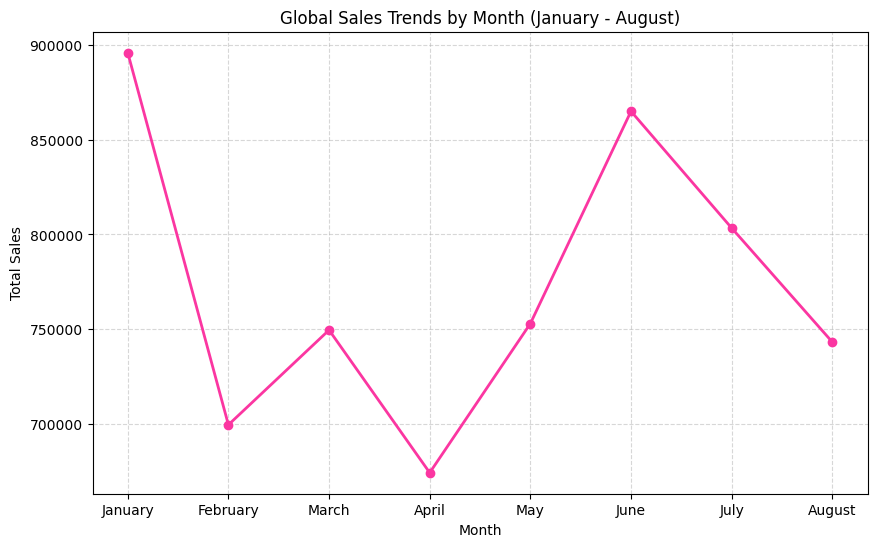

In [64]:
# Agréger les ventes par mois
monthly_sales = df.groupby('Month')['Amount'].sum()

# Graphique des ventes par mois
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='#fb36a1', linewidth=2)

# Ajout des labels et du titre
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Global Sales Trends by Month (January - August)")
plt.xticks(ticks=monthly_sales.index, labels=["January", "February", "March", "April", "May", "June", "July", "August"])
plt.grid(True, linestyle='--', alpha=0.5)

# Affichage du graphique
plt.show()

✅**Sales by Country (Trends and monthly)**

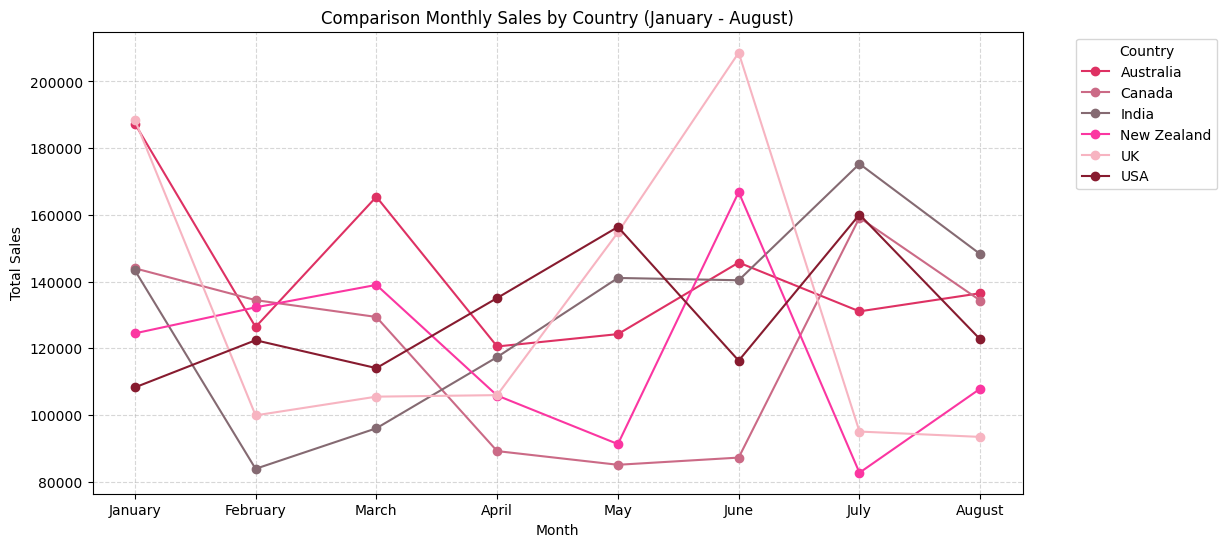

In [66]:
import matplotlib.pyplot as plt

# Liste HEX colors
colors_hex = ["#de3163", "#cb6a86", "#856a72", "#fb36a1", "#f7b4c1", "#871b2f"]

# Plot
plt.figure(figsize=(12,6))
# Aggregate total sales per month per country
monthly_sales_by_country = df.groupby(['Month', 'Country'])['Amount'].sum().unstack()
# Associate each country with a color with zip()
for country, color in zip(monthly_sales_by_country.columns, colors_hex):
    plt.plot(monthly_sales_by_country.index, monthly_sales_by_country[country], 
             marker='o', linestyle='-', color=color, label=country)

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Comparison Monthly Sales by Country (January - August)")
plt.xticks(ticks=monthly_sales_by_country.index, labels=["January", "February", "March", "April", "May", "June", "July", "August"])
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

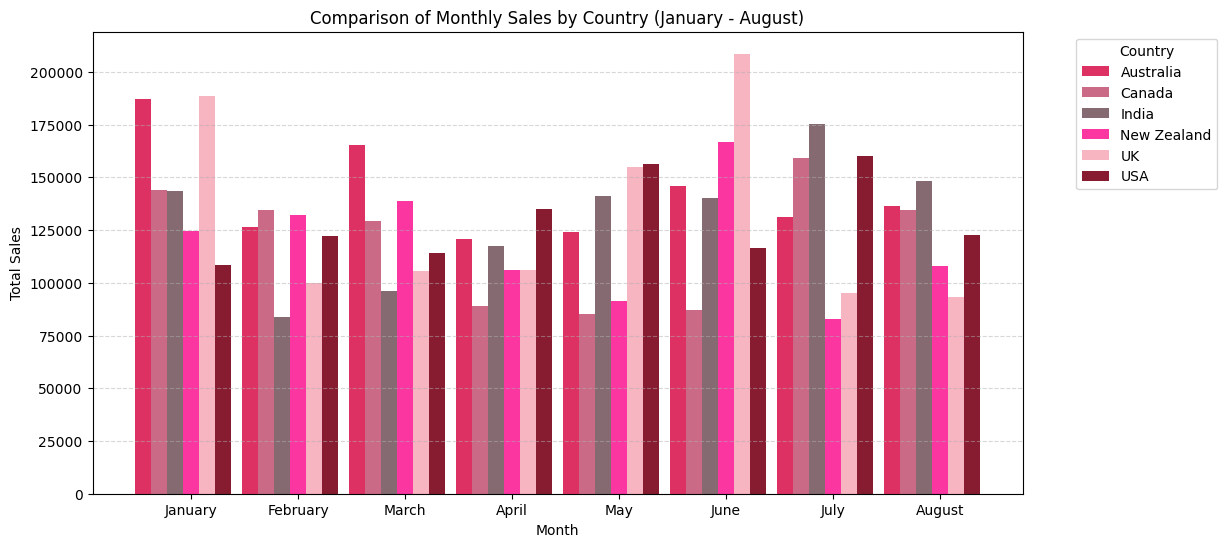

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Liste HEX colors
colors_hex = ["#de3163", "#cb6a86", "#856a72", "#fb36a1", "#f7b4c1", "#871b2f"]
# Aggregate total sales per month per country
monthly_sales_by_country = df.groupby(['Month', 'Country'])['Amount'].sum().unstack()
# Largeur des barres
bar_width = 0.15

# Création de l'axe X avec décalage pour chaque pays
x = np.arange(len(monthly_sales_by_country.index))

# Création du graphique
plt.figure(figsize=(12,6))

# Affichage des barres côte-à-côte pour chaque pays
for i, (country, color) in enumerate(zip(monthly_sales_by_country.columns, colors_hex)):
    plt.bar(x + i * bar_width, monthly_sales_by_country[country], width=bar_width, color=color, label=country)

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Comparison of Monthly Sales by Country (January - August)")
plt.xticks(ticks=x + bar_width * (len(colors_hex)/2), labels=["January", "February", "March", "April", "May", "June", "July", "August"])
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

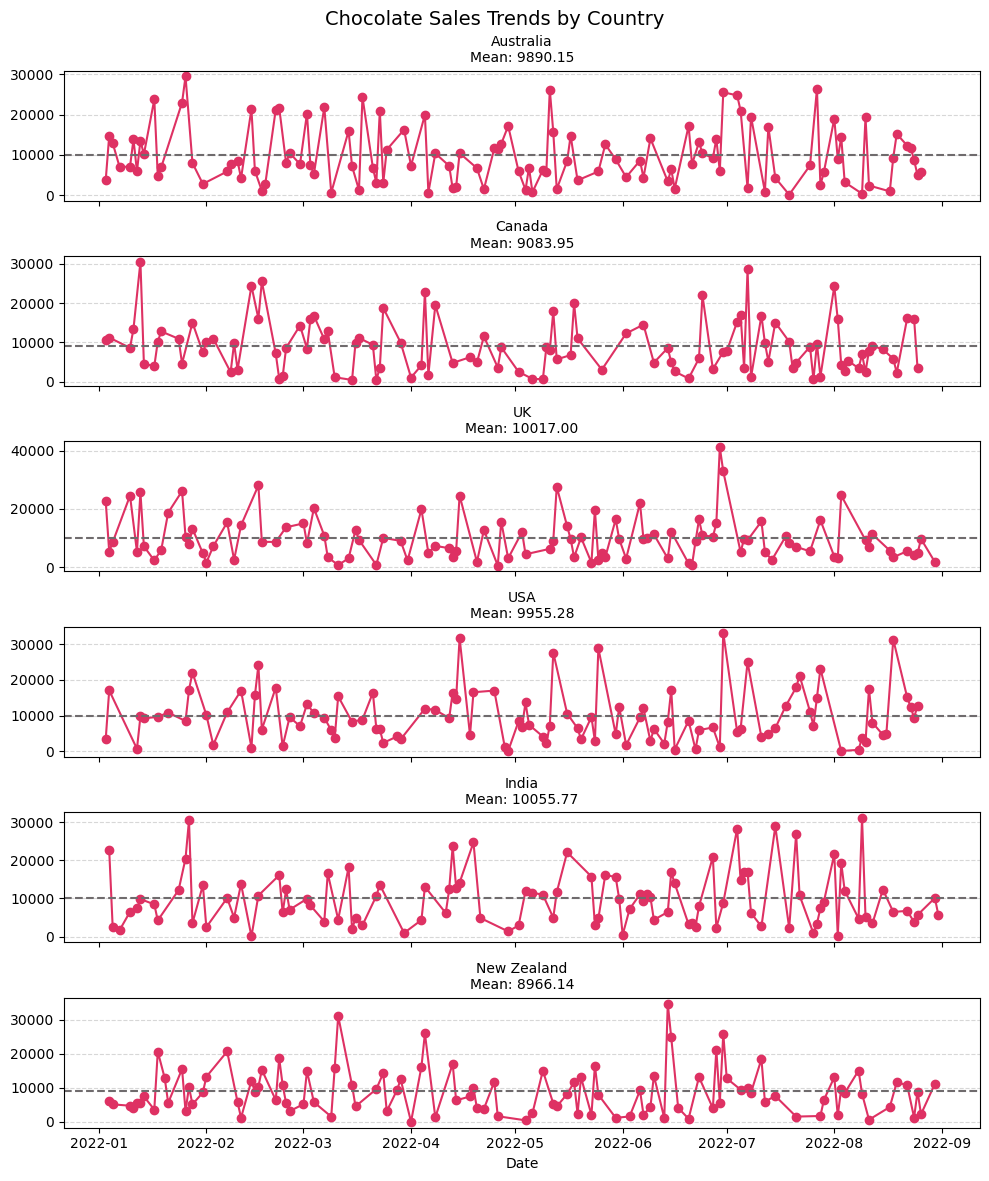

In [108]:
import pandas as pd
import matplotlib.pyplot as plt


# Group Sales by 'Date' and 'Country'
grouped_df = df.groupby(['Date', 'Country'])['Amount'].sum().reset_index()

# Country List
countries = grouped_df['Country'].unique()

# Ssubplots
fig, axes = plt.subplots(len(countries), 1, figsize=(10, 12), sharex=True)

# Plot line plot for each country and add the mean Amount Sales
for i, country in enumerate(countries):
    country_data = grouped_df[grouped_df['Country'] == country]
    mean_amount = country_data['Amount'].mean()  # Calculate the mean

    axes[i].plot(country_data['Date'], country_data['Amount'], marker='o', linestyle='-', color='#de3163', label="Sales")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    axes[i].axhline(y=mean_amount, color='#6f6b6d', linestyle='--')  
    legend_text = f"{country}\nMean: {mean_amount:.2f}"
    axes[i].set_title(legend_text, fontsize=10)

# Personnalisation
plt.xlabel("Date")
plt.xticks()
plt.suptitle("Chocolate Sales Trends by Country", fontsize=14)
plt.tight_layout()
plt.show()

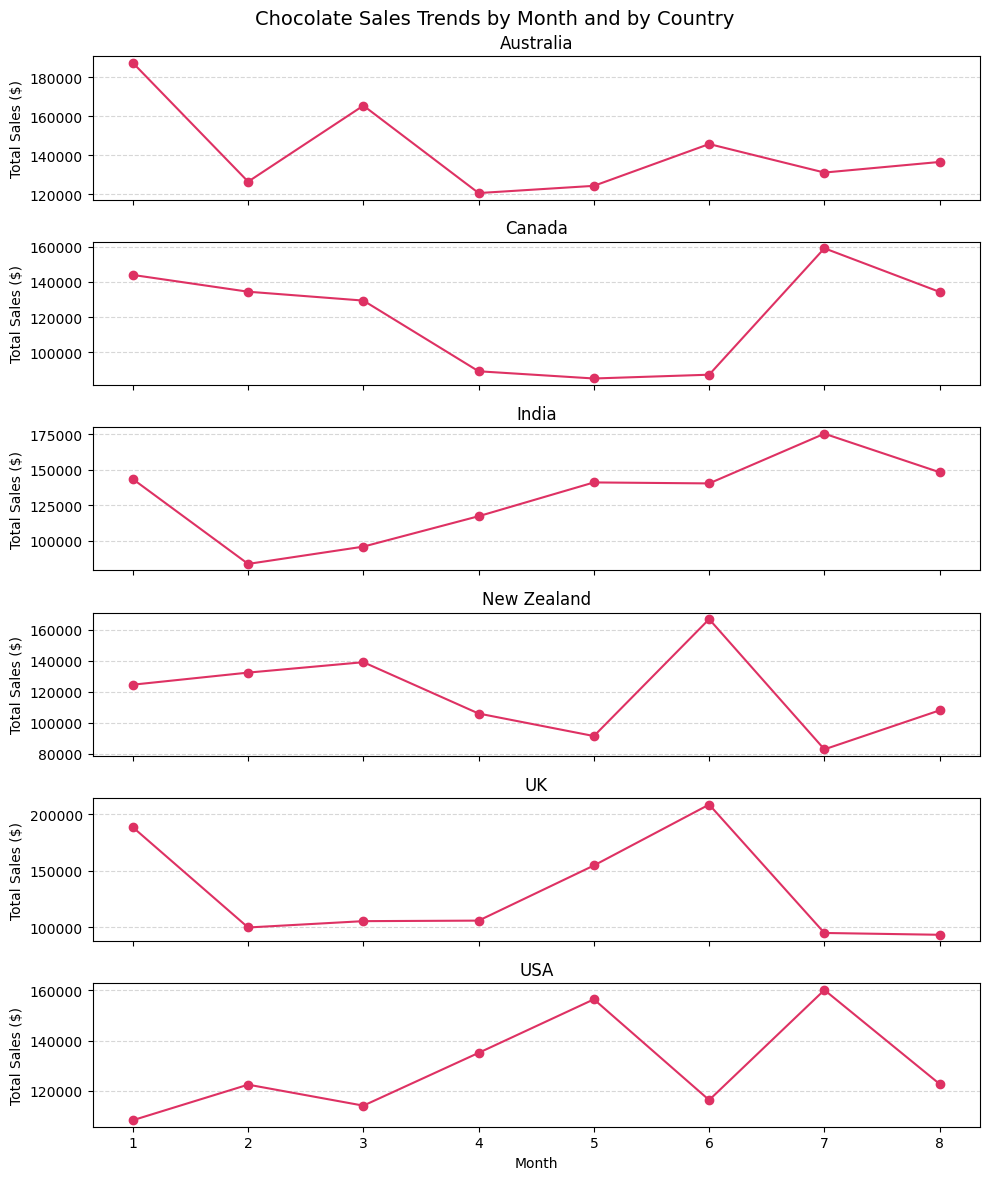

In [111]:
# Grouper les ventes par 'Month' et 'Country'
monthly_sales = filtered_df.groupby(['Month', 'Country'])['Amount'].sum().reset_index()

# Liste des pays
countries = monthly_sales['Country'].unique()

# Création des subplots
fig, axes = plt.subplots(len(countries), 1, figsize=(10, 12), sharex=True)

# Tracer les courbes pour chaque pays
for i, country in enumerate(countries):
    country_data = monthly_sales[monthly_sales['Country'] == country]
    axes[i].plot(country_data['Month'], country_data['Amount'], marker='o', linestyle='-', color='#de3163')
    axes[i].set_title(country)
    axes[i].set_ylabel("Total Sales ($)")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Optimisation de l'affichage
plt.xlabel("Month")
plt.xticks(range(1, 9))
plt.suptitle("Chocolate Sales Trends by Month and by Country", fontsize=14)
plt.tight_layout()
plt.show()

✅**Sales by Product**

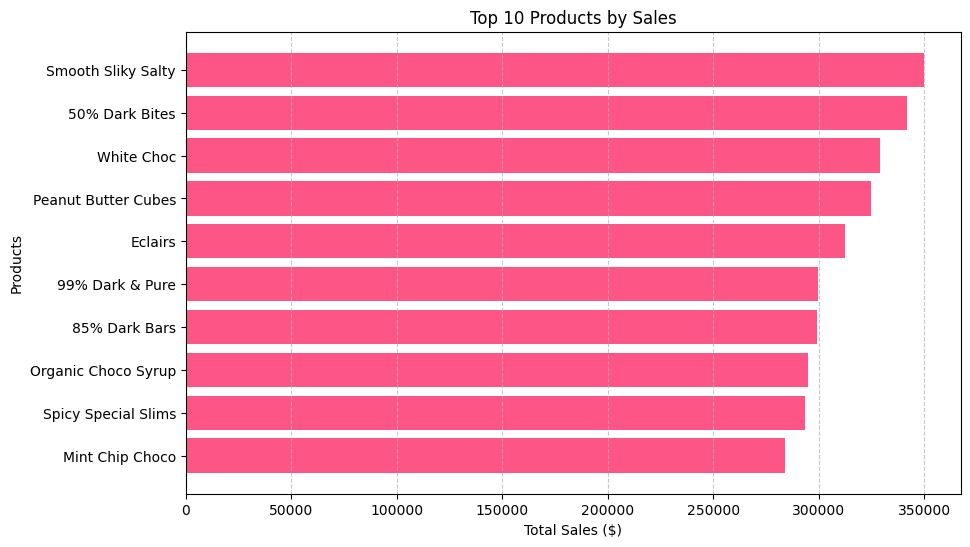

In [112]:
# Regrouper les ventes par produit et calculer le total des ventes
top_products = filtered_df.groupby('Product')['Amount'].sum().reset_index()

# Trier les produits par ventes décroissantes et sélectionner le top 10
top_products = top_products.sort_values(by='Amount', ascending=False).head(10)

# Création du graphique en barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_products['Product'], top_products['Amount'], color='#fd5585')
plt.xlabel("Total Sales ($)")
plt.ylabel("Products")
plt.title("Top 10 Products by Sales")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le produit le plus vendu en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()

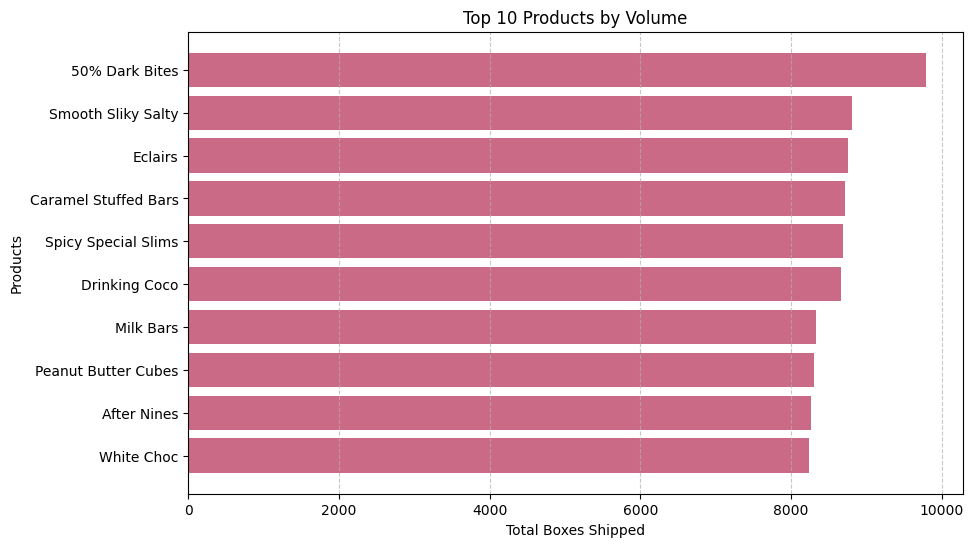

In [70]:
# Group Sales by Product and calculate Total Boxes Shipped
top_products = df.groupby('Product')['Boxes Shipped'].sum().reset_index()

# Sort and filter top 10 products
top_products = top_products.sort_values(by='Boxes Shipped', ascending=False).head(10)

# Bar chart horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_products['Product'], top_products['Boxes Shipped'], color='#cb6a86')
plt.xlabel("Total Boxes Shipped")
plt.ylabel("Products")
plt.title("Top 10 Products by Volume")
plt.gca().invert_yaxis()  # Invert y axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [113]:
# Group by 'Country' and 'Products' and calculate total of 'Boxes Shipped'
top_products_per_country = filtered_df.groupby(['Country', 'Product'])['Boxes Shipped'].sum().reset_index()

# Sort and order by Boxes Shipped
top_products_per_country = top_products_per_country.sort_values(['Country', 'Boxes Shipped'], ascending=[True, False])

# Select top 5 products by Boxes Shipped
top_5_products_per_country = top_products_per_country.groupby('Country').head(5)

# Display results
print(top_5_products_per_country)

         Country               Product  Boxes Shipped
0      Australia        50% Dark Bites           3182
5      Australia          Almond Choco           2174
1      Australia        70% Dark Bites           2103
20     Australia   Spicy Special Slims           2050
13     Australia             Milk Bars           1821
30        Canada  Choco Coated Almonds           2452
41        Canada    Smooth Sliky Salty           2271
32        Canada               Eclairs           2101
29        Canada  Caramel Stuffed Bars           2020
31        Canada         Drinking Coco           1980
64         India   Spicy Special Slims           2037
54         India               Eclairs           1985
48         India           After Nines           1874
51         India  Caramel Stuffed Bars           1635
65         India            White Choc           1629
80   New Zealand       Mint Chip Choco           2537
82   New Zealand   Organic Choco Syrup           1952
83   New Zealand   Peanut Bu

<Figure size 1200x600 with 0 Axes>

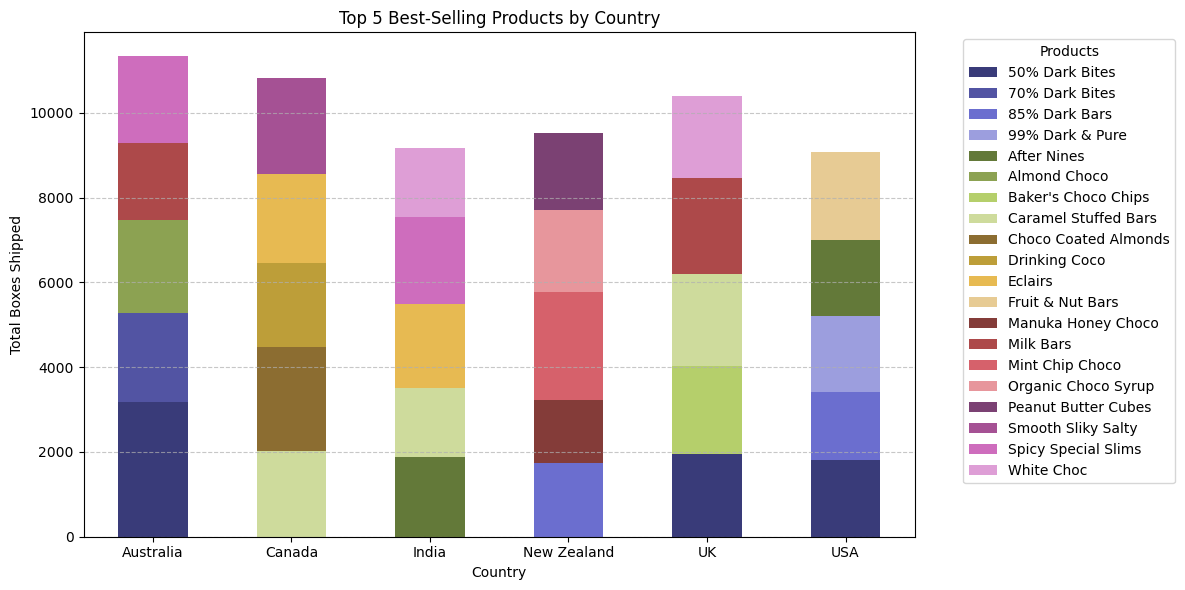

In [115]:
# Group Sales by 'Country' and 'Product' and calculate total 'Boxes Shipped'
grouped_df = df.groupby(['Country', 'Product'])['Boxes Shipped'].sum().reset_index()

# Sort Country by number of Boxes Shipped in descending order
grouped_df = grouped_df.sort_values(['Country', 'Boxes Shipped'], ascending=[True, False])

# Top 5 by Country
top_5_products_per_country = grouped_df.groupby('Country').head(5)

# Pivot table
pivot_df = top_5_products_per_country.pivot(index='Country', columns='Product', values='Boxes Shipped')

# Stacked bar plot
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(12, 6))

# Add title and labels
plt.xlabel("Country")
plt.ylabel("Total Boxes Shipped")
plt.title("Top 5 Best-Selling Products by Country")
plt.xticks(rotation=360)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The stacked bar chart representing the top 5 products by volume does not effectively differentiate color shades due to the presence of 22 product varieties and the limitations of the color palette.

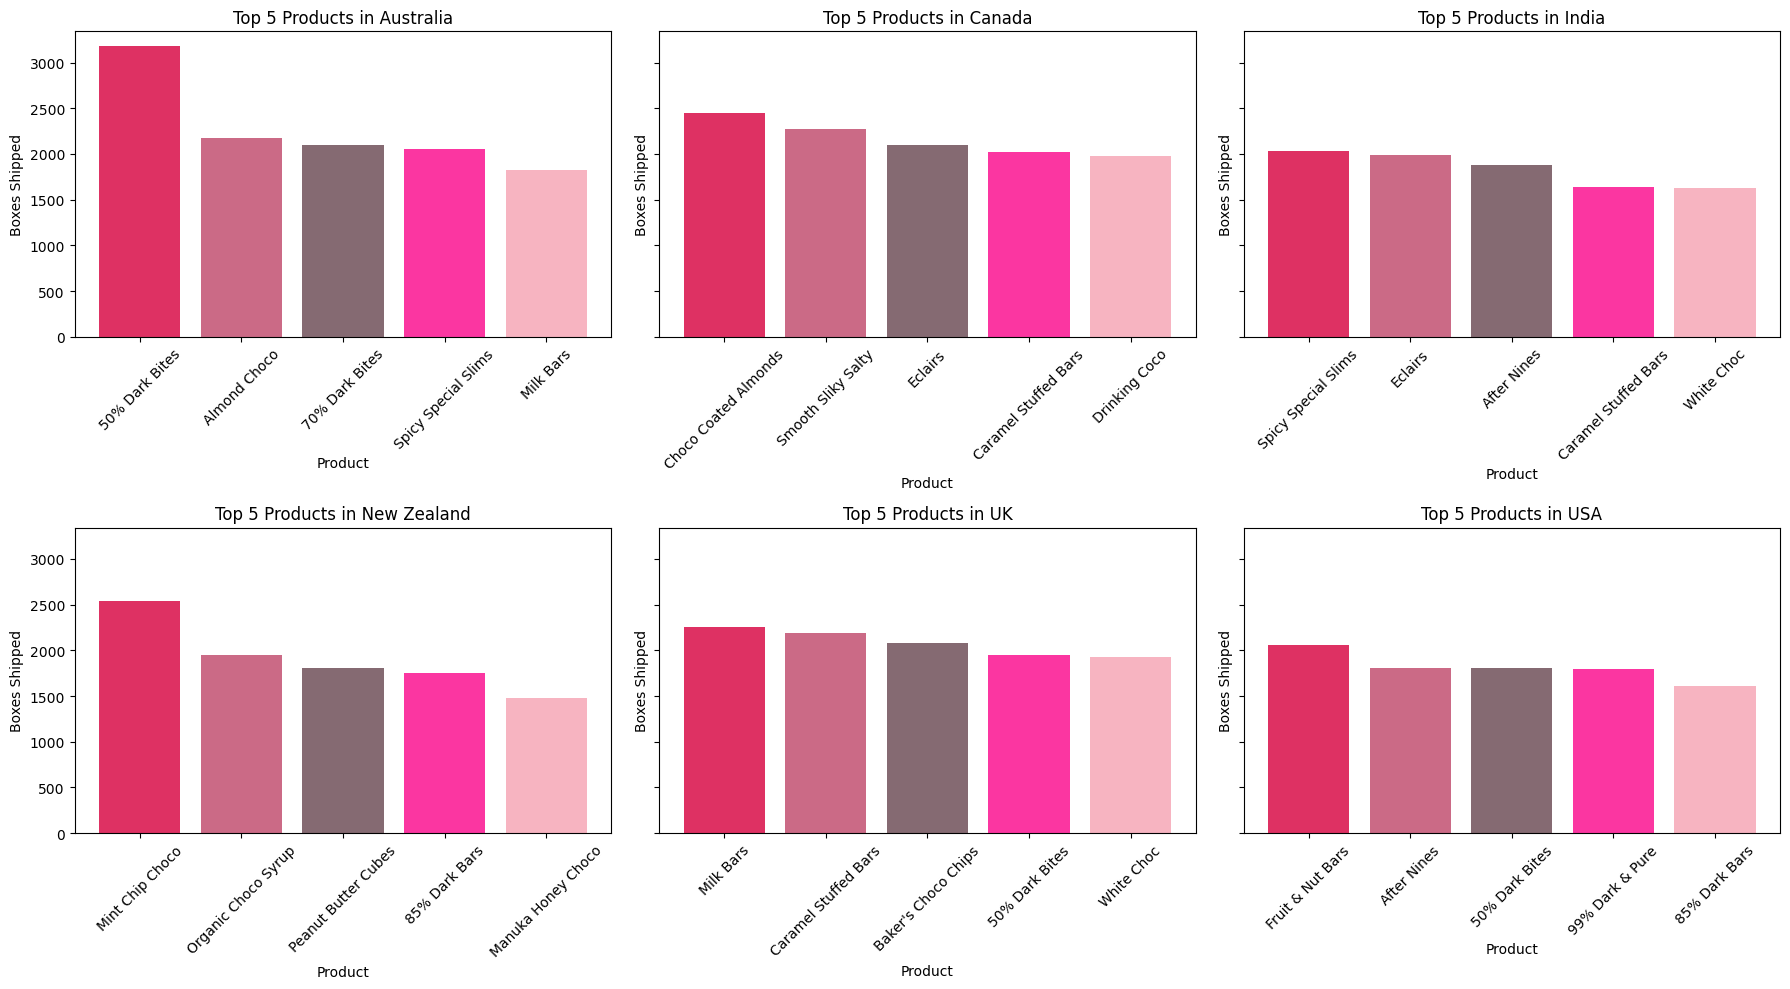

In [12]:
import matplotlib.pyplot as plt

# Group Sales by 'Country' and 'Product' and calculate total 'Boxes Shipped'
grouped_df = df.groupby(['Country', 'Product'])['Boxes Shipped'].sum().reset_index()

# Sort by 'Boxes Shipped' within each Country
grouped_df = grouped_df.sort_values(['Country', 'Boxes Shipped'], ascending=[True, False])

# Select top 5 products per Country
top_5_products_per_country = grouped_df.groupby('Country').head(5)

# Get unique Country names
countries = top_5_products_per_country['Country'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()
color_list = ["#de3163", "#cb6a86", "#856a72", "#fb36a1", "#f7b4c1"]
for i, country in enumerate(countries):
    # Filter data for the specific country
    country_df = top_5_products_per_country[top_5_products_per_country['Country'] == country]
    
    # Create bar plot
    axes[i].bar(country_df['Product'], country_df['Boxes Shipped'], color=color_list)
    
    # Set title and labels
    axes[i].set_title(f"Top 5 Products in {country}")
    axes[i].set_xlabel("Product")
    axes[i].set_ylabel("Boxes Shipped")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

✅**Sales by country : Choropleth**

⚠️**Do not execute the code below; it was generated to convert the .shp file from NaturalEarth into a geojson file usable by geopandas.⚠️**

The five cells in the notebook below were used to convert the shapefile (.shp) into a GeoJSON format, explore the GeoJSON file to align variable names for map generation (including country name identification), and ensure compatibility with the visualization. The GeoJSON file has already been converted and is stored on GitHub. It is accessed via the GitHub URL to generate the choropleth map.

Scroll down and execute the cells where **Start Here** is indicated.

In [117]:
import geopandas as gpd
import json
import requests

# Charger le fichier .shp
gdf = gpd.read_file("ne_110m_admin_0_countries.shp")

# Convertir en GeoJSON
geojson_data = gdf.to_json()

# Sauvegarder en fichier GeoJSON local
with open("ne_110m_admin_0_countries.geojson", "w") as f:
    f.write(geojson_data)

print("GeoJSON file created.")

GeoJSON file created.


In [118]:
print(gdf.columns)  # Liste toutes les colonnes du GeoDataFrame
print(gdf.head())  # Affiche les premières lignes pour voir les données

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United

In [121]:
df['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [122]:
gdf['SOVEREIGNT'].unique()

array(['Fiji', 'United Republic of Tanzania', 'Western Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan',
       'Chad', 'Haiti', 'Dominican Republic', 'Russia', 'The Bahamas',
       'United Kingdom', 'Norway', 'Denmark', 'France', 'East Timor',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'Ecuador', 'Jamaica', 'Cuba', 'Zimbabwe',
       'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin',
       'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Ivory Coast',
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone',
       'Burkina Faso', 'Central African Republic',
       'Republic of the Congo', 'Gabon', 'Equatorial

In [124]:
# Update Country name as GeoJSON
df['Country'] = df['Country'].replace({
    'UK': 'United Kingdom',
    'USA': 'United States of America'
})

print(df['Country'].unique())

['United Kingdom' 'India' 'Australia' 'New Zealand'
 'United States of America' 'Canada']


**👇Sart Here 👇**

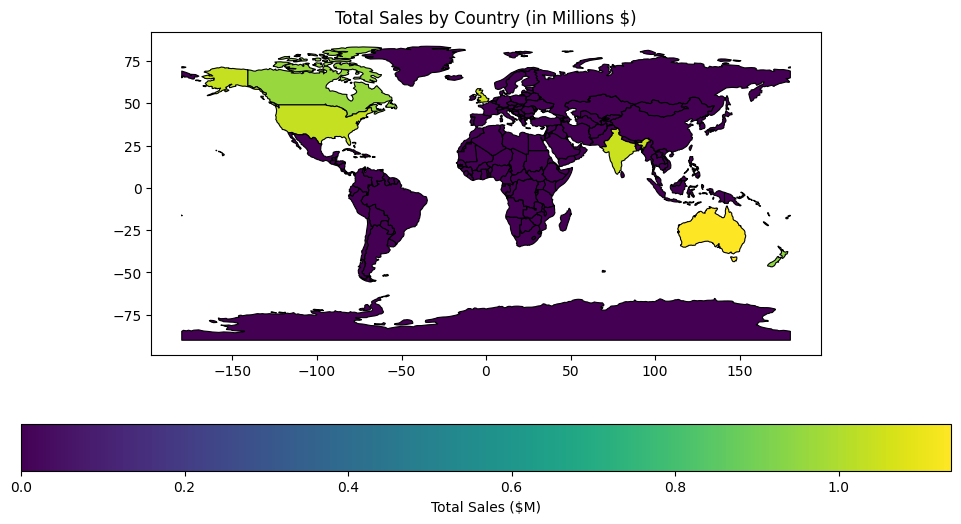

In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import io

# URL of GeoJSON on GitHub
geojson_url = "https://raw.githubusercontent.com/MagaliTrueAnalytics/Portfolio/main/Shapefile/ne_110m_admin_0_countries.geojson"

# Download file from GitHub
response = requests.get(geojson_url)
if response.status_code == 200:
    geojson_data = io.StringIO(response.text)
    gdf = gpd.read_file(geojson_data)  # read the GeoJSON file

    # Laod the Sales dataframe
    sales_by_country = df.groupby("Country")["Amount"].sum().reset_index()

    # Merge GeoJSON with Sales (using 'SOVEREIGNT' as key for Country)
    gdf = gdf.merge(sales_by_country, left_on="SOVEREIGNT", right_on="Country", how="left")

    # Replace NaN by 0 for Country without Sales
    gdf["Amount"] = gdf["Amount"].fillna(0)

    # Normalise Sales in millions $
    gdf["Amount_million"] = gdf["Amount"] / 1_000_000  

    # Create Choropleth
    fig, ax = plt.subplots(figsize=(12,6))
    gdf.plot(column="Amount_million", cmap="viridis", linewidth=0.8, edgecolor="black", 
         legend=True, ax=ax, legend_kwds={"label": "Total Sales ($M)", "orientation": "horizontal"})

    # Add title
    plt.title("Total Sales by Country (in Millions $)")
    plt.show()   
    

else:
    print("Error while Downloading : Verify URL of GeoJSON file.")

➡️Top Sales Person

In [73]:
df['Sales Person'].nunique()

25

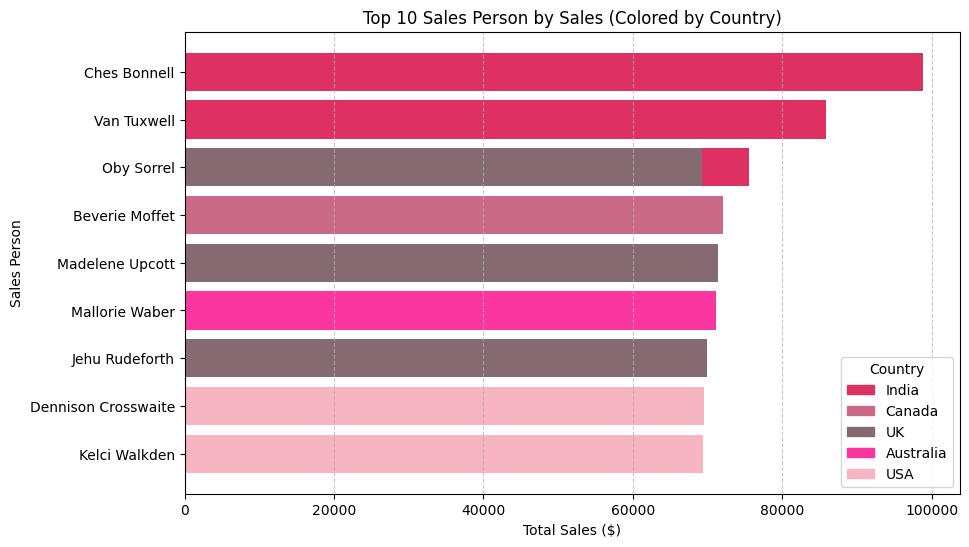

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Group by Sales Person and aggregate by total Amount
top_saler = df.groupby(['Sales Person', 'Country'])['Amount'].sum().reset_index()

# Sort Sales Person and select top 10
top_saler = top_saler.sort_values(by='Amount', ascending=False).head(10)

# Color List for each country
colors_list = ["#de3163", "#cb6a86", "#856a72", "#fb36a1", "#f7b4c1", "#871b2f"]

# Create a dictionnary associating each country to a specific color
unique_countries = top_saler['Country'].unique()
color_dict = {country: colors_list[i % len(colors_list)] for i, country in enumerate(unique_countries)}

# Apply color
colors = top_saler['Country'].map(color_dict)

# Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_saler['Sales Person'], top_saler['Amount'], color=colors)
plt.xlabel("Total Sales ($)")
plt.ylabel("Sales Person")
plt.title("Top 10 Sales Person by Sales (Colored by Country)")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher le plus performant en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create legend
patches = [mpatches.Patch(color=color_dict[country], label=country) for country in unique_countries]
plt.legend(handles=patches, title="Country", loc="lower right")

# Affichage du graphique
plt.show()

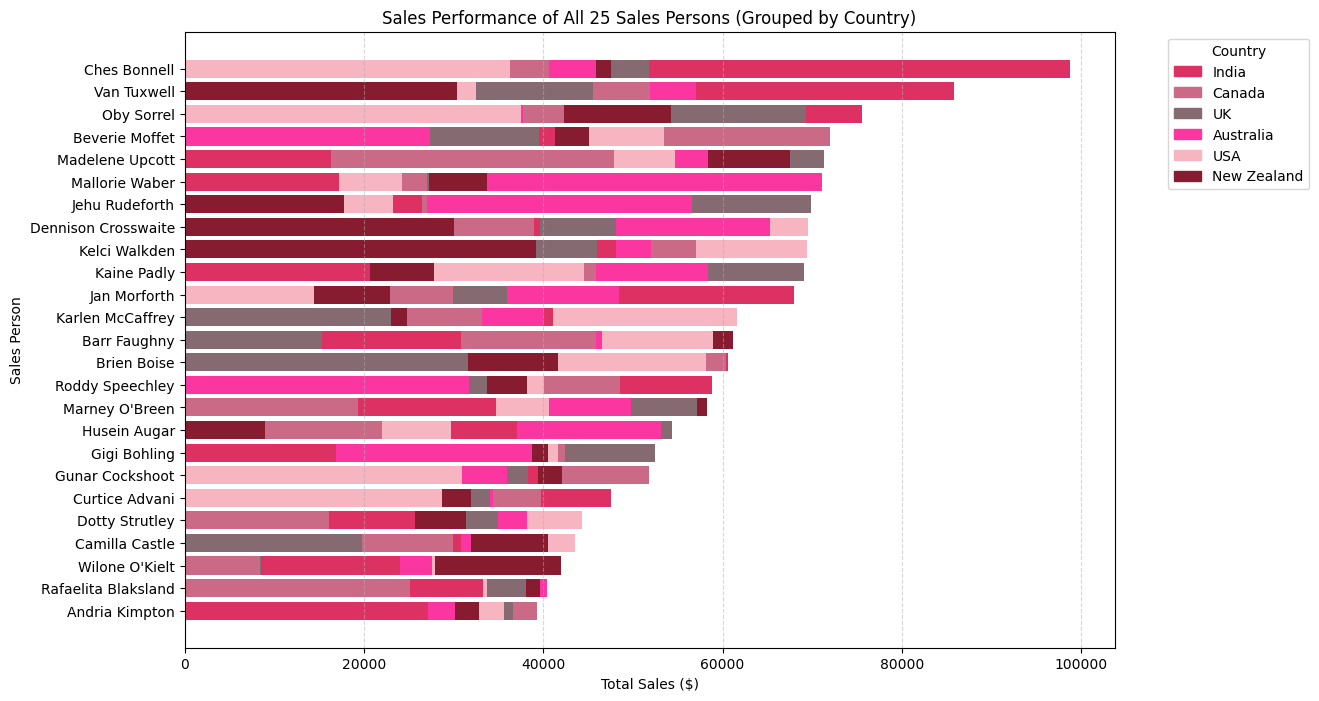

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate sales per Sales Person and Country
sales_by_person = df.groupby(['Sales Person', 'Country'])['Amount'].sum().reset_index()

# Sort by total sales for better visualization
sales_by_person = sales_by_person.sort_values(by='Amount', ascending=False)

# Unique countries & color mapping
unique_countries = sales_by_person['Country'].unique()
colors_list = ["#de3163", "#cb6a86", "#856a72", "#fb36a1", "#f7b4c1", "#871b2f"]
color_dict = {country: colors_list[i % len(colors_list)] for i, country in enumerate(unique_countries)}

# Assign colors to each Sales Person based on Country
colors = sales_by_person['Country'].map(color_dict)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.barh(sales_by_person['Sales Person'], sales_by_person['Amount'], color=colors)
plt.xlabel("Total Sales ($)")
plt.ylabel("Sales Person")
plt.title("Sales Performance of All 25 Sales Persons (Grouped by Country)")
plt.gca().invert_yaxis()  # Highest performer at the top
plt.grid(axis='x', linestyle="--", alpha=0.5)

# Add country legend
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=color_dict[country], label=country) for country in unique_countries]
plt.legend(handles=patches, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>📈Forecasting</h2>   
</div>

✅**Random Forest Regressor using 3 predictors : Product, Month, Country**

In [27]:
X = df[['Product_encoded', 'Month', 'Country_encoded']]
y = df['Amount']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calcul de la nouvelle erreur
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE with reduced features: {mae:.2f}")

MAE with reduced features: 3540.67


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Encodage des variables catégoriques
df['Country_encoded'] = df['Country'].astype('category').cat.codes
df['Product_encoded'] = df['Product'].astype('category').cat.codes
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Sélection des features et de la variable cible
X = df[['Country_encoded', 'Product_encoded', 'Boxes Shipped', 'Month']]
y = df['Amount']

# Séparation des données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialisation du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Entraînement sur les données d'entraînement
rf_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = rf_model.predict(X_test)

# Évaluation de la précision du modèle
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 3505.53


The forecast is monthly Sales for a given Product. The average monthly Sales by product is about 5000$. The model has more than 50% error.

✅**Ridge Regression using 3 predictors : Product, Month, Country**

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sélection des variables réduites
X = df[['Product_encoded', 'Month', 'Country_encoded']]
y = df['Amount']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle Ridge avec régularisation
ridge_model = Ridge(alpha=200)
ridge_model.fit(X_train, y_train)

# Prédictions
y_pred = ridge_model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE with Ridge Regression: {mae:.2f}")

MAE with Ridge Regression: 3278.16


✅**Polynomial model**

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Select features
X = df[['Product_encoded', 'Month', 'Country_encoded']]
y = df['Amount']

# Create pipeline with polynomial + Ridge
poly_ridge_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),  # Polynomial degree 3
    ("ridge", Ridge(alpha=200))  # Regularize Ridge
])

# Model Training
poly_ridge_pipeline.fit(X, y)

# Forecast total Sales by month
y_pred = poly_ridge_pipeline.predict(X)

# Comparison
print(f"MAE error with polynomial Ridge: {mean_absolute_error(y, y_pred):.2f}")


MAE error with polynomial Ridge: 3273.90


✅**Ridge Regression for Monthly Amount forecast using historical Data**

In [52]:
# Aggregate Sales by Month
df_monthly = df.groupby('Month')['Amount'].sum().reset_index()

# Ridge model to predict Total Amount by Month
X_monthly = df_monthly[['Month']]
y_monthly = df_monthly['Amount']

ridge_model_monthly = Ridge(alpha=200)
ridge_model_monthly.fit(X_monthly, y_monthly)

# Forecast for future month
predicted_sales = ridge_model_monthly.predict([[12]])  # Example for december 12
print(f"Forecast Total Sales for december : {predicted_sales[0]:.2f} $")


/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Forecast Total Sales for december : 771021.80 $


Forecast by Product

In [49]:
# Proportion of Sales by Product
product_distribution = df.groupby('Product_encoded')['Amount'].sum() / df['Amount'].sum()

# Forecast Sales by Product
predicted_sales_per_product = predicted_sales[0] * product_distribution

print(predicted_sales_per_product)

Product_encoded
0     42607.273319
1     26385.157990
2     37310.167006
3     37380.864915
4     32584.753663
5     34605.317366
6     31123.663538
7     28876.168274
8     30110.326838
9     32001.714115
10    38958.039261
11    32312.435790
12    34356.565463
13    33571.905951
14    35407.433151
15    31937.998715
16    36745.456545
17    40503.792314
18    33009.813932
19    43602.280930
20    36590.095708
21    41040.572737
Name: Amount, dtype: float64


Visualization of Ridge Regression Model forecast vs Historical Data

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


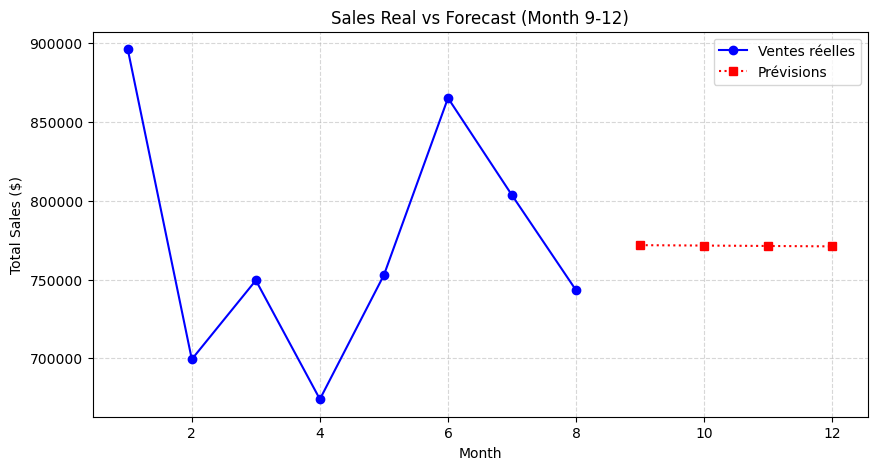

In [50]:
# Real Sales (month 1 to 8)
df_monthly_real = df.groupby('Month')['Amount'].sum().reset_index()
df_monthly_real = df_monthly_real[df_monthly_real['Month'] <= 8]  # Filter month 1-8

# Forecast 9-12
future_months = [9, 10, 11, 12]
predicted_sales_per_month = [ridge_model_monthly.predict([[month]])[0] for month in future_months]  # Prediction

# Plot
plt.figure(figsize=(10,5))

# Real Sales
plt.plot(df_monthly_real['Month'], df_monthly_real['Amount'], marker='o', linestyle='-', label="Ventes réelles", color="blue")

# Forecast Sales
plt.plot(future_months, predicted_sales_per_month, marker='s', linestyle='dotted', label="Prévisions", color="red")

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Sales Real vs Forecast (Month 9-12)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

<div style="padding:10px;border:2px solid black;">
    
<h3>⚠️Sales Forecasting Approaches and Their Limitations⚠️</h3>

1. **Machine Learning Approaches (Ridge Regression, Random Forest)**

   
    • Initially, we used three predictors: Product, Month, and Country.
    • Ridge regression provided a unreasonable estimate and failed to capture non-linear relationships and product-specific variations.
    • Random Forest, known for handling complex patterns, also struggled to model product-specific sales trends, likely due to insufficient historical data on key influencing factors.
    • Ridge regression was applied using only historical sales data ('Amount') to predict a monthly revenue model. However, it failed, providing only an averaged value rather than capturing meaningful trends. The model struggled to account for seasonal variations in the historical data, highlighting its limitations in identifying demand fluctuations over time. 
   

3. **Time-Series Models (ARIMA - not presented)**

   
    • ARIMA was tested to model seasonal trends and long-term variations.
    • However, after removing 'Product' as a predictor, the models generalized sales forecasts too much, failing to capture fluctuations between product categories.
    • Seasonal models predicted only an **averaged trend** rather than detecting sharp changes in demand per product.

4. **Polynomial Regression**

   
    • We tested polynomial regression (degree 2 and 3) to introduce non-linear interactions between Month and Country.
    • Despite minor improvements (small reduction in MAE), the model still produced **high errors** when forecasting sales per product.
    • This indicated that non-linearity alone is insufficient—sales likely depend on **factors that were not captured in the dataset**, such as **marketing**, **competition**, or **unpredictable demand shifts**.

   
**Hypothesis for Failure**

📌 Removing 'Product' as a predictor weakened forecasting accuracy. 📌 The **dataset lacks detailed seasonality patterns**, making **long-term predictions unreliable**. 📌 Simple ML models (Ridge, Random Forest) failed to capture demand volatility per product, as sales may be influenced by **external market forces**. 📌 Time-series methods require extensive historical data, but forecasting with months 1 to 8 only resulted in inaccurate extrapolation for months 9 to 12.

</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎭Storytelling</h2>   
</div>

<div style="padding:10px;border:2px solid black;">
See report !

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎭Results & Final Insights</h2>   
</div>

The outcomes of this project are presented through a **dashboard** and a **comprehensive report**, each offering valuable insights into sales trends and analysis.

**📊 Dashboard (IBM Cognos)**: 

A dynamic visualization showcasing key findings on chocolate sales across six countries. Due to subscription limitations, the dashboard is accessible only in PDF format. Users can explore revenue trends, product preferences, and sales performances through interactive charts. **Access the PDF file here: [Dashboard](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet2/Report/SweetData_Dashboard.pdf).**

**📄 Final Report (Google Slide)**:  

A detailed and well-structured document compiling all visualizations executed in Python and Jupyter Notebook. This report provides a complete breakdown of the methodology, findings, and strategic implications derived from data analysis. **View the full report here: [Final Report](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet2/Report/SweetData_Report.pdf).**

Both resources deliver a **data-driven narrative**, allowing for **better decision-making** in marketing, promotions, and sales strategies.🍫 
